In [2]:
##################################
####### run this code first ######
##################################

#library imports
import pandas as pd
pd.set_option('display.max_rows', 250, 'display.max_columns', None) #set pd display options

import datetime as dt
from datetime import datetime, timedelta, date
import calendar

import numpy as np
import matplotlib.pyplot as plt #visualizations
from collections import OrderedDict #ordered dict lib

#suppress warning for depreciated fxn
import warnings
warnings.filterwarnings('once')

#maps folder for functions
import sys
sys.path.append(r'/Users/XXXXXX/src/or_block_utilization')
#version of Python -=-=-=-
print(f'Python version:', sys.version)

from orutil import orutil

Python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


## Hypothetical ordered dictionary -
This is an example of the dictionary that would result from the hypothetical temporal case buildup from 02May2022 

In [2]:
mockup_oDict = OrderedDict([('2022-05-02',
              OrderedDict([('2022-01-03',
                           {'Department1-South Location':[111111]}),
                           ('2022-01-26',
                            {'Department1-South Location': [111111, 222222]}),
                           ('2022-03-17',
                            {'Department1-South Location': [111111,
                              222222,
                              333333]}),
                           ('2022-03-29',
                            {'Department1-South Location': [111111,
                              222222,
                              333333,
                              444444]}),
                           ('2022-04-14',
                            {'Department1-South Location': [111111,
                              222222,
                              333333,
                              444444,
                              555555]}),
                           ('2022-04-22',
                            {'Department1-South Location': [111111,
                              222222,
                              333333,
                              444444,
                              555555,
                              666666]})]))])
mockup_oDict


OrderedDict([('2022-05-02',
              OrderedDict([('2022-01-03',
                            {'Department1-South Location': [111111]}),
                           ('2022-01-26',
                            {'Department1-South Location': [111111, 222222]}),
                           ('2022-03-17',
                            {'Department1-South Location': [111111,
                              222222,
                              333333]}),
                           ('2022-03-29',
                            {'Department1-South Location': [111111,
                              222222,
                              333333,
                              444444]}),
                           ('2022-04-14',
                            {'Department1-South Location': [111111,
                              222222,
                              333333,
                              444444,
                              555555]}),
                           ('2022-04-22',
               

## Hypothetical data for plotting - 
* first result is the procedure date
* second result is a list of action dates (each "step" in the buildup time series trendline)
* third result is a list of lists of cases added at each action date

In [3]:
#cretae mockups key, date list, caseNums
mock_date_key, mock_dateList, mock_caseNums = orutil.makeDictPlottable(mockup_oDict)
mock_date_key, mock_dateList, mock_caseNums

('2022-05-02',
 ['2022-01-03',
  '2022-01-26',
  '2022-03-17',
  '2022-03-29',
  '2022-04-14',
  '2022-04-22'],
 [[111111],
  [111111, 222222],
  [111111, 222222, 333333],
  [111111, 222222, 333333, 444444],
  [111111, 222222, 333333, 444444, 555555],
  [111111, 222222, 333333, 444444, 555555, 666666]])

## Dictionary of each case and total minutes to complete (for a single procedure date)

In [4]:
mock_ORdateBlockDict = {111111: 30, 222222: 210, 333333: 150, 444444: 20, 555555: 80, 666666: 20}
mock_ORdateBlockDict

{111111: 30, 222222: 210, 333333: 150, 444444: 20, 555555: 80, 666666: 20}

## Accumulated list of minutes (tally of previous dictionary)

In [5]:
mock_accum_mins_list = [30, 240, 390, 410, 490, 510]
mock_accum_mins_list

[30, 240, 390, 410, 490, 510]

## List of accumulated percentages
This hypothetical list represents the previous list of accumulated procedure minutes converted to percentage of the whole time block.

In [6]:
#calc mock denom
# for mins in mock_accum_mins_list:
mock_accum_percent_util = orutil.percentUtil(mock_accum_mins_list, 510)
mock_accum_percent_util    

[0.058823529411764705,
 0.47058823529411764,
 0.7647058823529411,
 0.803921568627451,
 0.9607843137254902,
 1.0]

## Hypothetical dictionary of aggregated parameters and procedure dates
This dictionary has the selected parameters as the key (owner, dow, and OR number), followed by the list of procedure dates associated with them.

<b>NOTE:</b> The first item in the value list is the above date. So a temporal case buildup would exist for each of these dates in the list.

In [7]:
{('KOOP, CHARLES EVERETT', 'Monday', 'OR1111'): ['2022-05-02',
  '2021-02-22',
  '2021-05-24',
  '2021-04-19',
  '2021-06-14',
  '2021-07-12',
  '2021-10-25',
  '2021-09-20',
  '2022-01-24']}

{('KOOP, CHARLES EVERETT', 'Monday', 'OR1111'): ['2022-05-02',
  '2021-02-22',
  '2021-05-24',
  '2021-04-19',
  '2021-06-14',
  '2021-07-12',
  '2021-10-25',
  '2021-09-20',
  '2022-01-24']}

## Example of what the furthest back date could looklike before plotted

In [8]:
OrderedDict([(-90,
              [0,
               0,
               0.15833333333333333,
               0.49583333333333335,
               0,
               0.25,
               0.225,
               0,
               0.46458333333333335])])

OrderedDict([(-90,
              [0,
               0,
               0.15833333333333333,
               0.49583333333333335,
               0,
               0.25,
               0.225,
               0,
               0.46458333333333335])])

## Example of what the <i>least</i> furthest back date could looklike before plotted

In [4]:
OrderedDict([(-1,
              [1.0,
               0.93125,
               0.8854166666666666,
               0.8729166666666667,
               0.925,
               0.66875,
               0.8145833333333333,
               1.0,
               0.8041666666666667])])


OrderedDict([(-1,
              [1.0,
               0.93125,
               0.8854166666666666,
               0.8729166666666667,
               0.925,
               0.66875,
               0.8145833333333333,
               1.0,
               0.8041666666666667])])

## Hypothetical mean list and confidence interval list (generated from Mockups.xlsx) to plot

In [5]:
#generated in excel
mnList_mock = [0.28,0.28,0.28,0.28,0.28,0.287189542,0.298300654,0.298300654,0.298300654,0.298300654,0.311633987,0.311633987,0.27496732,0.27496732,0.27496732,0.27496732,0.27496732,0.27496732,0.27496732,0.282745098,0.282745098,0.314509804,0.314509804,0.314509804,0.314509804,0.314509804,0.314509804,0.282287582,0.282287582,0.282287582,0.282287582,0.316732026,0.316732026,0.316732026,0.316732026,0.316732026,0.316732026,0.376732026,0.376732026,0.404509804,0.404509804,0.404509804,0.404509804,0.404509804,0.404509804,0.404509804,0.404509804,0.404509804,0.404509804,0.404509804,0.428954248,0.428954248,0.428954248,0.484509804,0.484509804,0.517843137,0.517843137,0.528954248,0.559455338,0.57167756,0.57167756,0.57167756,0.57167756,0.57167756,0.59167756,0.603899782,0.649281046,0.649281046,0.671503268,0.671503268,0.671503268,0.688169935,0.66372549,0.66372549,0.66372549,0.737058824,0.737058824,0.783464052,0.794575163,0.794575163,0.794575163,0.794575163,0.794575163,0.839019608,0.845555556,0.884444444,0.884444444,0.884444444,0.884444444,0.884444444]
ciList_mock = [0.342016081,0.342016081,0.342016081,0.342016081,0.342016081,0.336022014,0.3268672,0.3268672,0.3268672,0.3268672,0.335250872,0.335250872,0.309439737,0.309439737,0.309439737,0.309439737,0.309439737,0.309439737,0.309439737,0.310460089,0.310460089,0.295805159,0.295805159,0.295805159,0.295805159,0.295805159,0.295805159,0.225326646,0.225326646,0.225326646,0.225326646,0.246267309,0.246267309,0.246267309,0.246267309,0.246267309,0.246267309,0.282557541,0.282557541,0.251470588,0.251470588,0.251470588,0.251470588,0.251470588,0.251470588,0.251470588,0.251470588,0.251470588,0.251470588,0.251470588,0.265644867,0.265644867,0.265644867,0.275636884,0.275636884,0.239034426,0.239034426,0.235164813,0.244274081,0.252545539,0.252545539,0.252545539,0.252545539,0.252545539,0.25991106,0.266039604,0.284892042,0.284892042,0.27045123,0.27045123,0.27045123,0.270115707,0.271734465,0.271734465,0.271734465,0.112804758,0.112804758,0.124684531,0.125780531,0.125780531,0.125780531,0.125780531,0.125780531,0.095608595,0.105013227,0.1582017,0.1582017,0.1582017,0.1582017,0.1582017]
x_mock = [-90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]

dow_mock = 'Monday'
owner_mock = 'Surgeon A'
roomID_mock = 'OR1111'

## Previous hypothetical values plotted

(array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 864x864 with 0 Axes>

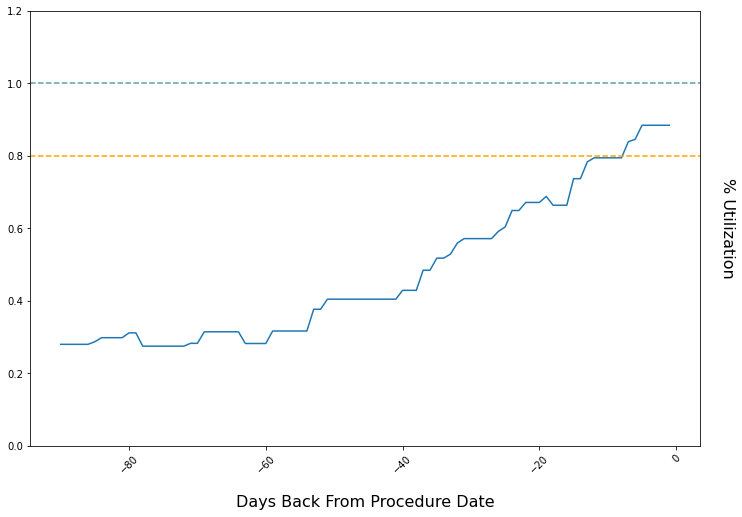

In [11]:
# Create the data set
plt.figure(figsize=(12, 12))

x = x_mock
y = mnList_mock

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Plot the function
plt.plot(x, y)

# #set y axis to always start at 0
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,1.2))

#rest of plt attributes
plt.ylabel("% Utilization", fontsize=16, rotation=-90, labelpad=35)
ax.yaxis.set_label_position("right")
plt.xlabel("Days Back From Procedure Date", fontsize=16, labelpad=20)
plt.axhline(y=1, color='cadetblue', linestyle='--')
plt.axhline(y=0.8, color='orange', linestyle='--')
plt.xticks(rotation = 45)
# plt.title(f'% Utilization of OR vs Days Back\nfrom Procedure Dates on '+
#           dow+'s\n'+ ' for '+ owner+ ' in %i' % roomID )

## Previous plot with confidence banding added

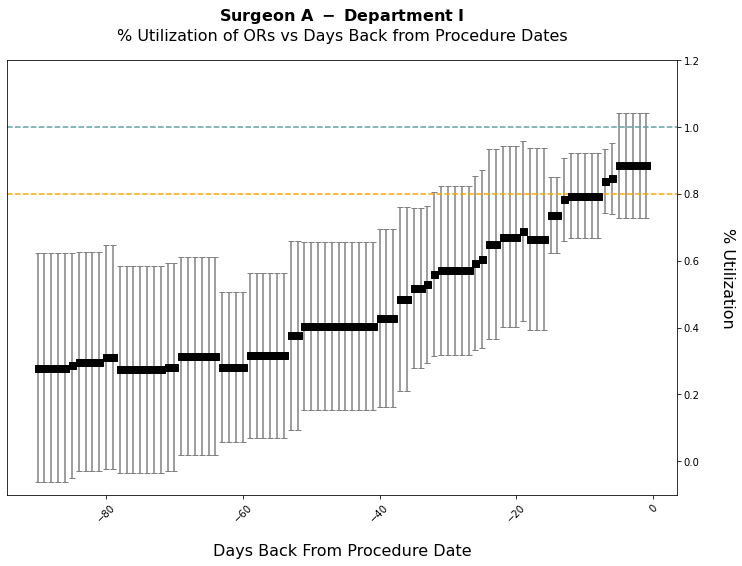

In [13]:
#add CI banding
# plt.figure(figsize=(12, 12))
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

x_1 = x_mock
y_1 = mnList_mock
err_1 = ciList_mock

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

plt.errorbar(x=x_1, y=y_1, yerr=err_1, color="gray", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="black", mec="black")


# #set y axis to always start at 0
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,-0.1,1.2))

#rest of plt attributes
plt.ylabel("% Utilization", fontsize=16, rotation=-90, labelpad=35)
plt.xlabel("Days Back From Procedure Date", fontsize=16, labelpad=20)
plt.axhline(y=1, color='cadetblue', linestyle='--')
plt.axhline(y=0.8, color='orange', linestyle='--')
plt.xticks(rotation = 45)
ax.yaxis.set_label_position("right")
# plt.title(f'% Utilization of OR vs Days Back\nfrom Procedure Dates on '+
#           dow+'s\n'+ ' for '+ owner+ ' in %i' % roomID )
#abbreviated title for dows
# plt.title("$\\bf{Surgeon\ A\ -\ }$" + r"$\bf{" + str(dow) + "s" + "}$" +
#           "\n% Utilization of ORs vs Days Back from Procedure Dates", fontsize=16, pad=20)
#abbreviated title for Surgeon Only
plt.title("$\\bf{Surgeon\ A\ -\ Department\ I}$" +
          "\n% Utilization of ORs vs Days Back from Procedure Dates", fontsize=16, pad=20)
plt.show()